In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle
#%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (7.0, 5.0)

import scipy.stats as sc
from IPython.display import HTML, display
import ipywidgets as wg

# Correlation time

In [2]:
def uncorr_err(Lx_err, Lx_tau):
    Lx_max_tau = []
    for i,taus in enumerate(Lx_tau):
        max_tau = np.nanmax(taus)
        x_max_tau = np.tile(max_tau, len(taus))
        Lx_max_tau.append(x_max_tau)
    Lx_terr = np.sqrt((1+2*np.array(Lx_max_tau))*np.array(Lx_err))
    #Lx_terr = np.sqrt((1+2*np.array(Lx_tau))*np.array(Lx_err))
    return(Lx_terr)

In [3]:
CorrData = pickle.load(open('1DcorrData.p', 'rb'))
possibleScales = CorrData['possibleScales']; temperatures = CorrData['temperatures']
LcorrEdata = CorrData['LcorrEdata']; LtauEdata = CorrData['LtauEdata']
LcorrMdata = CorrData['LcorrMdata']; LtauMdata = CorrData['LtauMdata']
Lcorr_nng_data = CorrData['Lcorr_nng_data']; Ltau_nng_data = CorrData['Ltau_nng_data']

In [4]:
tauData = [['','MAXtauE', 'MAXtauM', 'MAXtau_nng']]

for i,L in enumerate(possibleScales):
    row = []
    tauE = round(max(LtauEdata[i]),3); tauM = round(max(LtauMdata[i]),3); tau_nng = round(max(Ltau_nng_data[i]),3)
    j = np.argmax(LtauEdata[i]); k = np.argmax(LtauMdata[i]); l = np.argmax(Ltau_nng_data[i])
    T1 = temperatures[j]; T2 = temperatures[k]; T3 = temperatures[l]
    row.append('L = %d'%(L)); row.append('%.1f (T=%.2f)'%(tauE,T1)); row.append('%.1f (T=%.2f)'%(tauM,T2))
    row.append('%.1f (T=%.2f)'%(tau_nng,T3))
    tauData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tauData)
       )
))

L = 256


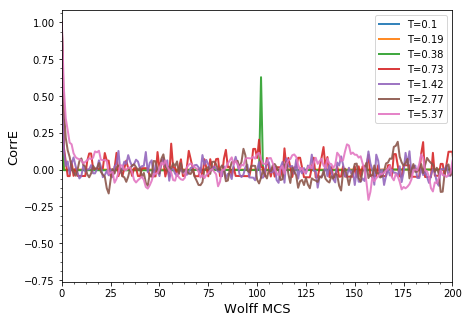

In [5]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(LcorrEdata[0][0]))
i = 1 # index of scales
k = 0 # index of temperature
step = 5

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,LcorrEdata[i][j+step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('Wolff MCS',fontsize=13); ax1.set_ylabel('CorrE', fontsize=13)
ax1.legend()
ax1.set_xlim([0,200])
ax1.minorticks_on()

print('L = %d'%(possibleScales[i]))
#print('Correlation time (decay length) of the energy(nng):', LtauE[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])

if save:
    plt.savefig('1DcorrE_vs_t')

# Energy function

In [6]:
Ldata = pickle.load(open('1Dfinite_size_scaling_data.p', 'rb'))
Len_data = Ldata['Len_data']; Len_err = Ldata['Len_err']; Lnng_data = Ldata['Lnng_data']; Lnng_err = Ldata['Lnng_err']
L_CvEdata = Ldata['L_CvEdata']; L_Cv_nng_data = Ldata['L_Cv_nng_data']; temperatures = Ldata['temperatures']
scales = Ldata['scales']; t_prod = Ldata['t_prod']

#Lnng_data = np.array(Lnng_data); substract = np.array(scales)
#substract = substract[:,np.newaxis]
#substract = tile(substract, (1,Lnng_data.shape[1]))

#Lnng_data = (Lnng_data-substract)/substract

print('results for the regular Ising model were gathered from the following number of sampled configurations:', t_prod)

results for the regular Ising model were gathered from the following number of sampled configurations: 25000


In [7]:
Len_terr = uncorr_err(Len_err, LtauEdata); Lnng_terr = uncorr_err(Lnng_err, Ltau_nng_data)
print(Len_terr)
print(Lnng_terr)

[[  0.           0.           0.           0.           0.
    0.           0.           1.23680358   2.56413889   4.20063948
    6.13583088   8.13681354   9.86457072  10.95232808  11.85786587
   12.78847098  13.74302373  14.61941779  15.34113788  16.00362818
   16.45104594  17.01921143  17.29000363  17.23042842  17.87901295
   17.90890752  18.01256657  17.95299895  18.03478426  18.28029863
   18.33592159  18.276367    18.36381919  18.78541726]
 [  0.           0.           0.           0.           0.
    0.           2.89896301   4.9726862    8.04814844  11.82176285
   15.03632971  17.13190037  19.37878268  22.20836761  24.59974396
   26.74990961  28.48128271  30.03343418  31.52836312  33.00984319
   34.70439576  35.43699284  35.56872163  36.7905764   36.86673616
   37.31661741  37.20003041  37.70123312  38.01950874  38.06146728
   38.89602899  37.67344134  38.46312635  38.45062111]
 [  0.           0.           0.           0.           2.1977543
    3.10800068   7.32485509  12.2715

In [8]:
Len_nw_data = []
for i,L in enumerate(scales):
    en_nw = Lnng_data[i]-2*L
    #print(en_nw)
    #print(Len_data[i])
    Len_nw_data.append(en_nw)
Len_nw_terr = Lnng_terr.copy()

In [9]:
print(len(Len_data[0]))

34


##### Finite size scaling 

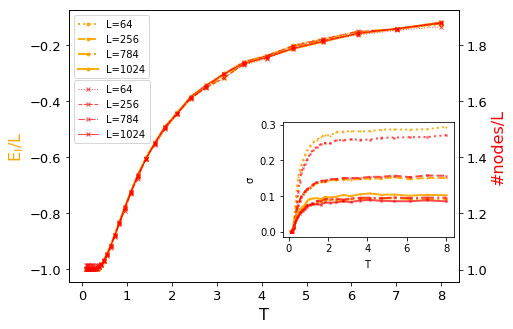

In [10]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E_I/L}$', fontsize=16, color='orange')
ax2.set_ylabel('#nodes/L', fontsize=16, color='r')
ax1.tick_params(axis='both', which='both', labelsize=13)
ax2.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.55, 0.25, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=10)

for i,L in enumerate(scales[0:]):
    
    ax1.plot(temperatures, Len_data[i]/L, marker='o', markersize=3, alpha=0.9, label='L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax2.plot(temperatures, (Lnng_data[i])/L, marker='x',markersize=4, alpha=0.7, label='L=%d'%(L), color='r', 
             linestyle=ls[i], linewidth=1)
    ax3.plot(temperatures, Len_terr[i]/L,  marker='o', markersize=1, alpha=0.9, label='L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Lnng_terr[i]/L,  marker='x', markersize=2, alpha=0.7, label='L=%d'%(L), color='r', 
             linestyle=ls[i], linewidth=2)
    #if i==i or i==i:
        #ax1.errorbar(temperatures, Len_data[i]/L, yerr=Len_terr[i]/L, alpha=0.2, color='orange', linestyle='')
        #ax2.errorbar(temperatures, Lnng_data[i]/L, yerr=Lnng_err[i]/L, alpha=0.2, color='r', linestyle='')
    
ax1.legend(loc='upper left'); 
ax2.legend(loc=(0.015,0.51))
#ax1.set_ylim([-1.1,0.03])
#ax2.set_ylim([0.9,1.9])

if save:
    plt.savefig('1D_L_E_nng_vs_T')

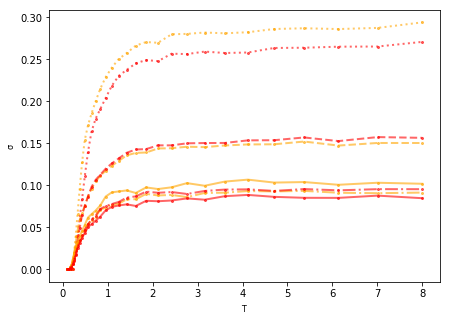

In [11]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
ax3 = fig.add_subplot(1,1,1)
#left, bottom, width, height = [0.55, 0.22, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax3.plot(temperatures, Len_terr[i]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Lnng_terr[i]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color='r', 
             linestyle=ls[i], linewidth=2)
    
#ax1.set_ylim([-1.1,0.03])
#ax2.set_ylim([0.9,1.9])

if save:
    plt.savefig('1D_L_E_nng_vs_T_err')

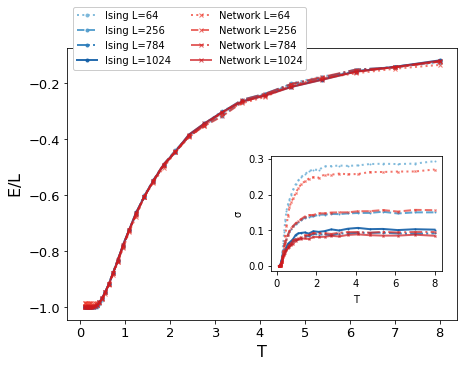

In [12]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E/L}$', fontsize=16)#, color='orange')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=16, color='r')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70; cm.autumn; cm.winter
left, bottom, width, height = [0.53, 0.26, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=10)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, Len_data[i]/L, marker='o', markersize=3, alpha=0.9, label='Ising L=%d'%(L), 
             color=cm.Blues(120+i*30), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures[i:], Len_data[i][i:]/L, yerr=Len_terr[i][i:]/L, alpha=0.5, color=cm.winter(i*100), linestyle='', 
                 #errorevery=3, capsize=3)
    ax3.plot(temperatures[i:], Len_terr[i][i:]/L,  marker='o', markersize=1, alpha=0.9, label='L=%d'%(L), 
             color=cm.Blues(120+i*30), linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales[0:]): 
    ax1.plot(temperatures, Len_nw_data[i]/L, marker='x',markersize=4, alpha=0.7, label='Network L=%d'%(L), 
             color=cm.Reds(160+i*10), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures[i:], Len_nw_data[i][i:]/L, yerr=Len_nw_terr[i][i:]/L, alpha=0.5, color=cm.autumn(i*60), 
                 #linestyle='', errorevery=3, capsize=3)
    ax3.plot(temperatures, Len_nw_terr[i]/L,  marker='x', markersize=2, alpha=0.7, label='L=%d'%(L), color=cm.Reds(160+i*10), 
             linestyle=ls[i], linewidth=2)

ax1.legend(loc=(0.015,0.92), ncol=2, framealpha=1)
#ax1.legend(loc=[1.01,0.55]); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('1D_L_E_Enw_vs_T')

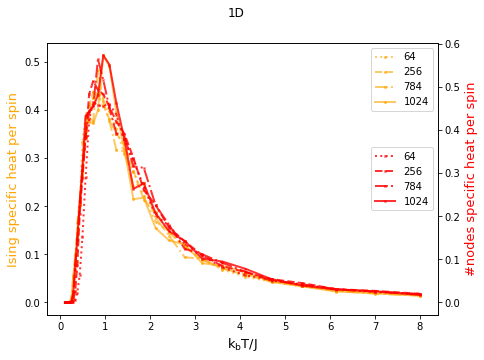

In [13]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax11.set_ylabel('Ising specific heat per spin', fontsize=13, color='orange')
ax12.set_ylabel('#nodes specific heat per spin', fontsize=13, color='r')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, L_CvEdata[i]/L, marker='o', markersize=2, alpha=0.6, label='%d'%(L), color='orange',
            linestyle=ls[i], linewidth=2)
    ax12.plot(temperatures, L_Cv_nng_data[i]/L, marker='x',markersize=2, alpha=0.8, label='%d'%(L), color='r',
            linestyle=ls[i], linewidth=2)
ax11.legend(loc='upper right')
ax12.legend(loc='center right')

if save:
    plt.savefig('1D_L_CvE_Cv_nng_vs_T')

##### Correlation

In [14]:
rData = [['','r(E,nng)']]

for i,L in enumerate(scales):
    cor = np.corrcoef(Len_data[i], Lnng_data[i])
    r = cor[0,1]
    row = []
    row.append('L = %d'%(L)); row.append(r)
    rData.append(row)
        
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in rData)
       )
))

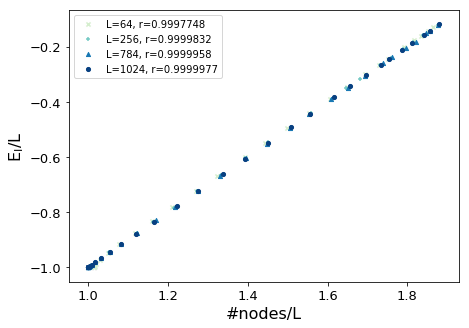

In [15]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('#nodes/L', fontsize=16)
ax1.set_ylabel('$\mathrm{E_I/L}$',fontsize=16)
ax1.tick_params(axis='both', which='both', labelsize=13)
ms = ['x', '+', '^', 'o']

for i,L in enumerate(scales):
    rm = np.corrcoef(Lnng_data[i], Len_data[i]) 
    r = rm[0,1]
    ax1.scatter(Lnng_data[i]/L, Len_data[i]/L, marker=ms[i], s=17, label='L=%d, r=%.7f'%(L,r), c=cm.GnBu(50+i*80))
    #ax1.plot(, , marker='o', markersize=2, alpha=0.6, label='%d'%(L), color='orange', 
     #        linestyle=ls[i], linewidth=0)

ax1.legend(loc='upper left'); 

if save:
    plt.savefig('1D_L_E_vs_nng')

##### Largest scale 

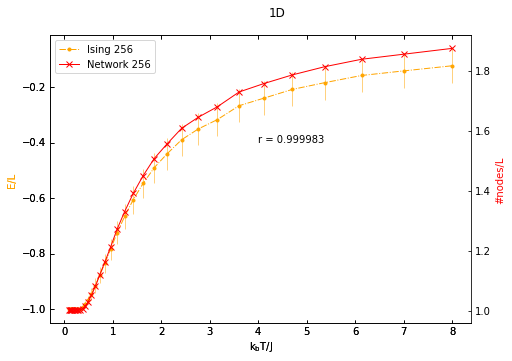

In [16]:
save = False
Lidx  = 1 # scale index
L = scales[Lidx]

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

fig = plt.figure(figsize=(9,5)); fig.suptitle('1D')

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Temperature")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

offset = (60, 0)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(-1.1, 0.02)

host.set_xlabel("$\mathrm{k_bT/J}$", fontsize=13)
host.set_ylabel("E/L", fontsize=13)
par1.set_ylabel("#nodes/L")

p1, = host.plot(temperatures, Len_data[Lidx]/L, label="Ising %d"%(L), marker='o', markersize=3, color='orange', linestyle='-.', linewidth=1)
p2, = par1.plot(temperatures, Lnng_data[Lidx]/L, label="Network %d"%(L), marker='x', markersize=6, color='r', linewidth=1)

p1err = host.errorbar(temperatures, Len_data[Lidx]/L, yerr=Len_err[Lidx]/L, fmt='none', color=p1.get_color(), elinewidth=0.5, 
                      errorevery=1)
#p2err = par1.errorbar(temperatures[1:], Lnng_data[Lidx][1:]/L, yerr=Lnng_err[Lidx][1:]/L, fmt='none', color=p2.get_color(), elinewidth=0.5, 
#                      errorevery=2)

#par1.set_ylim(0.9, 1.9)
r = np.corrcoef(Len_data[Lidx], Lnng_data[Lidx])[0,1]
host.legend()
host.annotate('r = %.6f'%(r), (4,-0.4))

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

if save:
    plt.savefig('1D_E_nng_vs_T_L=%d'%(L))

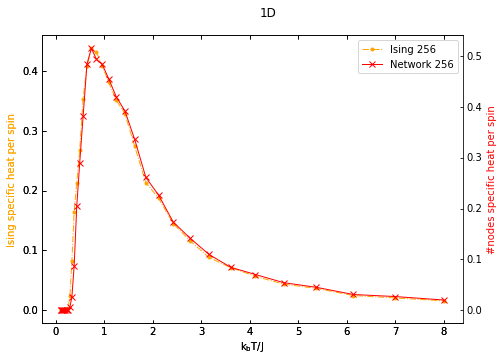

In [17]:
save = False
Lidx  = 1 # scale index
L = scales[Lidx]

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

fig = plt.figure(figsize=(9,5)); fig.suptitle('1D')

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Temperature")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

offset = (60, 0)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("$\mathrm{k_bT/J}$", fontsize=13)
host.set_ylabel("Ising specific heat per spin", fontsize=13)
par1.set_ylabel("#nodes specific heat per spin")

p1, = host.plot(temperatures, L_CvEdata[Lidx]/L, label="Ising %d"%(L), marker='o', markersize=3, color='orange', linestyle='-.', linewidth=1)
p2, = par1.plot(temperatures, L_Cv_nng_data[Lidx]/L, label="Network %d"%(L), marker='x', markersize=6, color='r', linewidth=1)

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)
host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

if save:
    plt.savefig('1D_CvE_Cv_nng_vs_T_L=%d'%(L))

##### Magnetization

In [18]:
Ldata_mag = pickle.load(open('1Dfinite_size_scaling_data_mag.p', 'rb'))
Lmag_data= Ldata_mag['Lmag_data']; Lmag_err = Ldata_mag['Lmag_err']; Lsusc_data = Ldata_mag['Lsusc_data']
temperatures = Ldata_mag['temperatures']; scales = Ldata_mag['scales']; t_prod = Ldata_mag['t_prod']
print('results for the regular Ising model were gathered from the following number of sampled configurations:', t_prod)

results for the regular Ising model were gathered from the following number of sampled configurations: 25000


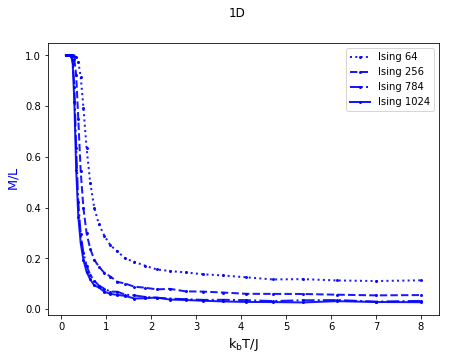

In [19]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{M/L}$', fontsize=13, color='b')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Lmag_data[i]/L, marker='o', markersize=2, alpha=0.9, label='Ising %d'%(L), 
             color='b', linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    
ax1.legend()

if save:
    plt.savefig('1D_L_M_vs_T')

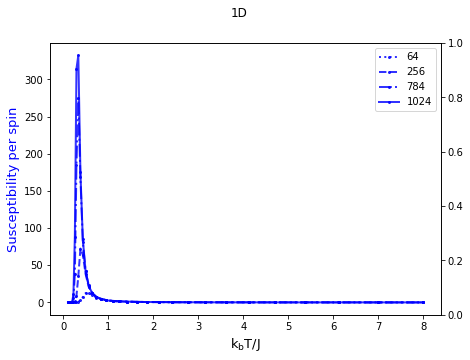

In [20]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax11.set_ylabel('Susceptibility per spin', fontsize=13, color='b')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, Lsusc_data[i]/L, marker='o', markersize=2, alpha=0.8, label='%d'%(L), color='b',
            linestyle=ls[i], linewidth=2)

ax11.legend()

if save:
    plt.savefig('1Dsusc_vs_T')

##### Collisions relative frequency

In [21]:
Ldata_col = pickle.load(open('1Dfinite_size_scaling_data_col.p', 'rb'))
Lcol_data= Ldata_col['Lcol_data']; Lcol_norm_data = Ldata_col['Lcol_norm_data']
temperatures = Ldata_col['temperatures']; scales = Ldata_col['scales']

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


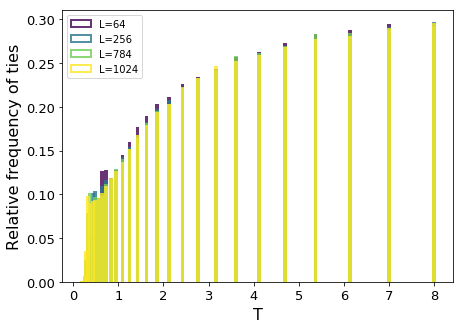

In [22]:
save = False

fig1 = plt.figure(figsize=(7,5))#; fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1)

ax11.set_xlabel('$\mathrm{T}$',fontsize=16)
ax11.set_ylabel('Relative frequency of ties', fontsize=16, color='black')
ax11.tick_params(axis='both', which='both', labelsize=13)

for i,L in enumerate(scales):
    ax11.bar(temperatures, Lcol_data[i]/Lcol_norm_data[i], align='center', width=0.04, alpha=0.8, label='L=%d'%(L), 
             color=cm.viridis(i*100), fill=False, edgecolor=cm.viridis(i*100), linewidth=2)
    
ax11.legend(loc='upper left')

if save:
    plt.savefig('1Drfreq_col_vs_T')

# Free energy

In [23]:
Lf_data = pickle.load(open('1Dfree_energy_finite_size_scaling.p', 'rb'))
f_exact = Lf_data['f_exact']; Len_fr = Lf_data['Len_fr']; LenS = Lf_data['LenS']; Len_data = Lf_data['Len_data']
Len_err = Lf_data['Len_err']; Len_hist_data = Lf_data['Len_hist_data']; Len_bin_edges_data = Lf_data['Len_bin_edges_data']
temperatures = Lf_data['temperatures']; scales= Lf_data['scales']; t_prod = Lf_data['t_prod'] 
print('results were gathered from the following number of sampled configurations:', t_prod)


results were gathered from the following number of sampled configurations: 40000


In [24]:
Len_fr_err = []

for i,L in enumerate(scales):
    e = abs(Len_fr[i]/L-f_exact)
    Len_fr_err.append(e)

##### Energy histograms 

In [25]:
def check_visual(i, hists, bins):

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    
    b1 = bins[i]
    h1 = hists[i]
    print(b1)
    l = np.argmax(h1)
    temperature1 = temperatures[i]
    
    b2 = bins[i+1]
    h2 = hists[i+1]
    k = np.argmax(h2)+1
    temperature2 = temperatures[i+1]
    
    ax.plot(b1/L, h1,label='T=%.2f'%(temperature1), markersize=3, linestyle='-', marker='o', linewidth=1, color='#1f77b4')
    ax.plot(b1[l:]/L, h1[l:], markersize=6, color='#1f77b4', marker='o', linewidth=2)
    
    ax.plot(b2/L, h2,label='T=%.2f'%(temperature2), markersize=3, linestyle='-', marker='o', linewidth=1, color='orange')
    ax.plot(b2[:k]/L, h2[:k], markersize=6, color='orange', marker='o', linewidth=2)
    
    ax.legend()
    #ax5.set_yscale('log')

Scale=64


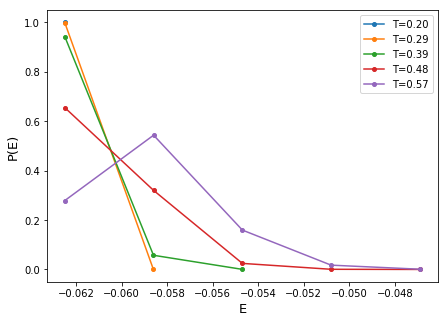

In [26]:
%matplotlib inline
fig5 = plt.figure(figsize=(7,5))
ax5 = fig5.add_subplot(1,1,1)
ax5.set_xlabel('E', fontsize=13)
ax5.set_ylabel('P(E)', fontsize=13)

idx = 0
print('Scale=%d'%(scales[idx]))
l = 1
k = 5
for i,temperature in enumerate(temperatures[l:k+1]):
    ax5.plot(Len_bin_edges_data[idx][l+i]/(L), Len_hist_data[idx][l+i],label='T=%.2f'%(temperature), markersize=4, 
             linestyle='-', marker='o')
    
ax5.legend()
#ax5.set_yscale('log')

save = False
if save:
    plt.savefig('1Den_hist_%d_%d'%(l,k))

In [27]:
print('Scale=%d'%(scales[idx]))
wg.interact(check_visual, hists=wg.fixed(Len_hist_data[idx]), bins=wg.fixed(Len_bin_edges_data[idx]), 
            i=(0,len(temperatures)-2))

Scale=64


interactive(children=(IntSlider(value=11, description='i', max=23), Output()), _dom_classes=('widget-interact'â€¦

<function __main__.check_visual(i, hists, bins)>

##### Free energy finite size scaling 

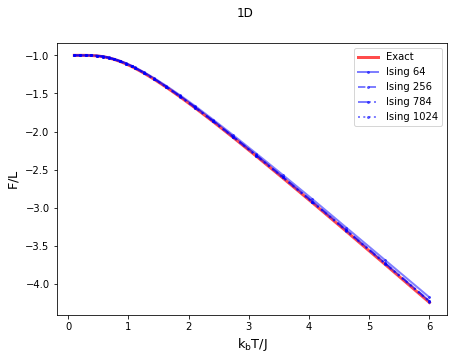

In [28]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{F/L}$', fontsize=13)
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
ax1.plot(temperatures, f_exact, alpha=0.7, label='Exact', color='r', linewidth=3)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_fr[i]/L, marker='o', markersize=2, alpha=0.5, label='Ising %d'%(L), 
             linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

ax1.legend()

if save:
    plt.savefig('1D_Len_fr_vs_T')

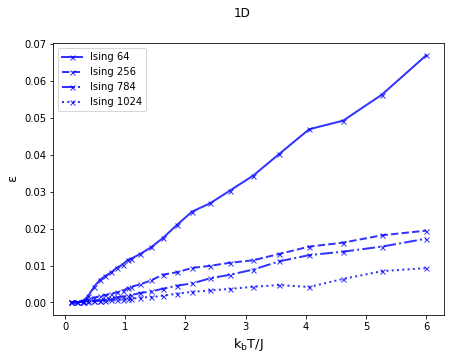

In [30]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{\epsilon}$', fontsize=13)#, color='b')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)

for i,L in enumerate(scales):
    #ax1.plot(temperatures, Len_fr[i]/L, marker='o', markersize=2, alpha=0.5, label='Ising %d'%(L), 
    #         linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax1.plot(temperatures, Len_fr_err[i], marker='x',markersize=5, alpha=0.8, label='Ising %d'%(L), color='b', 
             linestyle=ls[i], linewidth=2)
    
#ax1.legend(loc='upper left'); 
ax1.legend()

if save:
    plt.savefig('1D_Len_fr_err_vs_T')

Entropy:

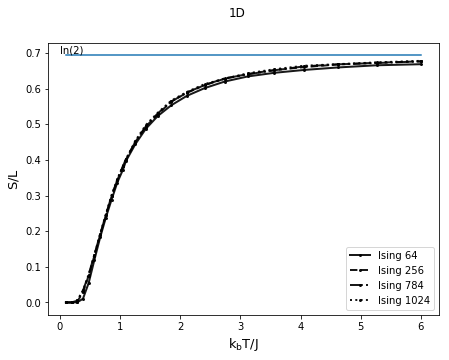

In [32]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{S/L}$', fontsize=13)
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)

ax1.plot(temperatures, np.tile(np.log(2), len(temperatures)))
ax1.annotate('ln(2)', (0,0.7))

for i,L in enumerate(scales):
    ax1.plot(temperatures, LenS[i]/L, marker='o', markersize=2, alpha=0.9, label='Ising %d'%(L), 
             linestyle=ls[i], linewidth=2, color='black')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    
ax1.legend()

if save:
    plt.savefig('1D_LenS_vs_T')